In [1]:
# 1、读取数据
# 2、整理数据格式，数据清洗，剔除其中为0、NaN，不在上海范围内的数据
# 3、描述性统计，
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyecharts as pe

In [82]:
data = np.loadtxt('bike.csv', dtype=np.str,delimiter = ',', skiprows = 1,usecols = (2,4,5,6))
bid = data[:,0].astype(int)
lat = data[:,2].astype(float)
lng = data[:,3].astype(float)
d,h,w,m=[],[],[],[]
for item in data[:,1]:
    d.append(int(item[8:10]))
    h.append(int(item[11:13]))
    w.append(pd.to_datetime(d[-1]).weekday())
    m.append(int(item[5:7]))
#date = np.array(d, dtype = np.datetime64)


In [84]:
print(max(lng), min(lng), max(lat), min(lat))

121.6590225 121.3261686 31.37167887 31.10827132


In [78]:
data = pd.read_csv('bike.csv')
data.head()

,id,unique_id,car_id,bike_type,time,lat,lng,center,distance,createdAt,updatedAt
0,200809,8621230846_3117773_12142354,8621230846,1,2017-08-12 13:48:16.091186+08,31.177730,121.423548,0101000020E6100000FB6D53671B5B5E40D49F9BB87F2D...,86,2017-08-12 13:48:16.091186+08,2017-08-12 13:48:16.091186+08
1,171060,0216787333_3123060_12133998,216787333,1,2017-08-12 16:15:42.647204+08,31.230604,121.339990,0101000020E6100000F7DC1F65C2555E40830FACD8083B...,55,2017-08-12 13:46:13.251187+08,2017-08-12 16:15:42.647204+08
2,10090,0216124607_3118200_12142685,216124607,2,2017-08-12 14:00:55.75919+08,31.182005,121.426855,0101000020E61000006B496396515B5E40976C09DA972E...,85,2017-08-12 13:35:28.25134+08,2017-08-12 14:00:55.75919+08
3,201095,0210073741_3127465_12151786,210073741,1,2017-08-12 15:51:44.216796+08,31.274651,121.517861,0101000020E6100000CD42B1A124615E40A0513F8C4F46...,13,2017-08-12 13:48:17.35929+08,2017-08-12 15:51:44.216796+08
4,286862,0216080576_3127588_12157902,216080576,2,2017-08-12 17:51:23.466872+08,31.275883,121.579024,0101000020E61000007556BFB80E655E4051AAC444A046...,85,2017-08-12 13:54:23.377769+08,2017-08-12 17:51:23.466872+08


In [ ]:
max(data[data.car_id == ])

In [57]:
data = {
    'bid':bid,
    'day':d,
    'lng':lng,
    'lat':lat,
    'mon':m,
    'weekday':w,
    'hour':h
}
data = pd.DataFrame(data)
data.head()

,bid,day,lng,lat,mon,weekday,hour
0,8621230846,12,121.423548,31.177730,8,3,13
1,216787333,12,121.339990,31.230604,8,3,16
2,216124607,12,121.426855,31.182005,8,3,14
3,210073741,12,121.517861,31.274651,8,3,15
4,216080576,12,121.579024,31.275883,8,3,17


In [52]:
id_set = set(data.bid)
id_dataFrame = []
for each_id in id_set:
    id_dataFrame.append(len(data[data.bid == each_id]))

id_dataFrame[:5]


[7, 4, 4, 4, 3]

In [83]:
len(id_dataFrame)

308837

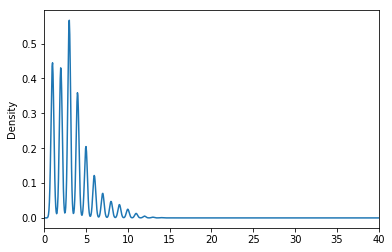

In [80]:
df = pd.DataFrame(id_dataFrame)
df.plot(kind = 'kde', xlim = (0,40), legend = False)

In [220]:
for key, value in id_dataFrame.iteritems():
    

SyntaxError: invalid syntax (<ipython-input-220-09e1e0b4719b>, line 1)

In [42]:
data.describe()

,bid,lng,lat
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.673403e+09,1.214712e+02,3.123615e+01
std,3.182670e+09,7.105171e-02,5.790457e-02
min,1.060950e+08,1.213262e+02,3.110827e+01
25%,2.160775e+08,1.214191e+02,3.119395e+01
50%,2.165956e+08,1.214694e+02,3.123764e+01
75%,2.167959e+08,1.215227e+02,3.127792e+01
max,8.716531e+09,1.216590e+02,3.137168e+01


In [43]:
#列级别的判断,但凡某一列有null值或空的，则为真
data.isnull().any()

bid     False
time    False
lng     False
lat     False
dtype: bool

In [ ]:
#统计重复记录数
data.duplicated().sum()
data.drop_duplicates()

In [1]:
#对于工作日的统计：
y = []
for i in range(7):
    y.append(data.weekday[data.weekday == i].count())
bar = pe.Bar('weekday')
bar.add('', ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],y)
bar

NameError: name 'data' is not defined

In [38]:
from pyecharts import options as opts
from pyecharts.charts import HeatMap

heat = []
for w in range(24):
    h = data[data.hour == w].weekday.value_counts()
    
    [heat.append([w, i, int(h[i])]) for i in range(7)]

yaxis = ['Mon', "Tue", 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

def heatmap_base() -> HeatMap:
    c = (
        HeatMap()
        .add_xaxis(list(range(24)))
        .add_yaxis("Number of Points", yaxis, heat)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-星期-时间"),
            visualmap_opts=opts.VisualMapOpts(type_ = 'color', min_ = 0, max_ = 143734, is_calculable = True),
        )
    )
    return c
graph = heatmap_base()
graph.render()

'/Users/valarian/SJTU/SJTU/Data/render.html'

In [14]:
h = data[data.weekday == 0].hour.value_counts()
type(int(h[0]))

int

In [281]:
#对于月份的统计：
x = ['2018-01', '2017-08', '2017-09', '2017-10', '2017-11']
y = [4, 1037794, 7475, 3024, 278]
# for i in sorted(set(data.mon)):
#     x.append(i)
#     y.append(data.mon[data.mon == i].count())
line = pe.Line('Month')
line.add('', x ,y)

line

In [165]:
#对于小时的统计：
x = []
y = []
for i in sorted(set(data.hour)):
    x.append(i)
    y.append(data.hour[data.hour == i].count())
line = pe.Line('Hour')
line.add('', x ,y)

line

In [ ]:
#尝试pyecharts画经纬度散点图
import pyecharts as pe
#print(lat[:5],lng[:5])
# a= [1,2,3]
# b = [2,3,4]
scatter = pe.Scatter('lat and lng')
scatter.add('', lng, lat, symbol_size = 0.1, xaxis_min = min(lng), xaxis_max = max(lng), yaxis_min = min(lat), yaxis_max = max(lat))
scatter.render(path = 'LngAndLat.png')

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [59]:
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/Data/shanghaitown/shanghaitown.shp')

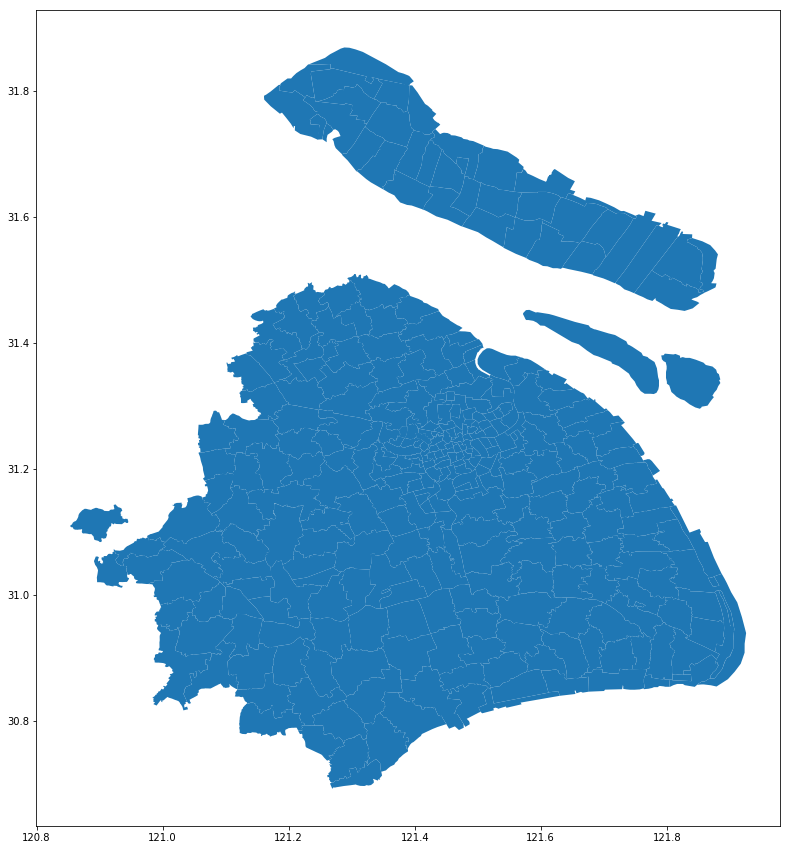

In [60]:
fig, ax = plt.subplots(figsize = (15,15))
city_map.plot(ax = ax)

In [61]:
geometry = [Point(xy) for xy in zip(lng, lat)]
geometry[:3]

In [62]:
#crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(data, geometry = geometry)
geo_df.head()

,bid,day,lng,lat,mon,weekday,hour,geometry
0,8621230846,12,121.423548,31.177730,8,3,13,POINT (121.4235476 31.17773012)
1,216787333,12,121.339990,31.230604,8,3,16,POINT (121.3399899 31.23060373)
2,216124607,12,121.426855,31.182005,8,3,14,POINT (121.4268547 31.18200457)
3,210073741,12,121.517861,31.274651,8,3,15,POINT (121.5178608 31.2746513)
4,216080576,12,121.579024,31.275883,8,3,17,POINT (121.5790235 31.27588301)


No handles with labels found to put in legend.


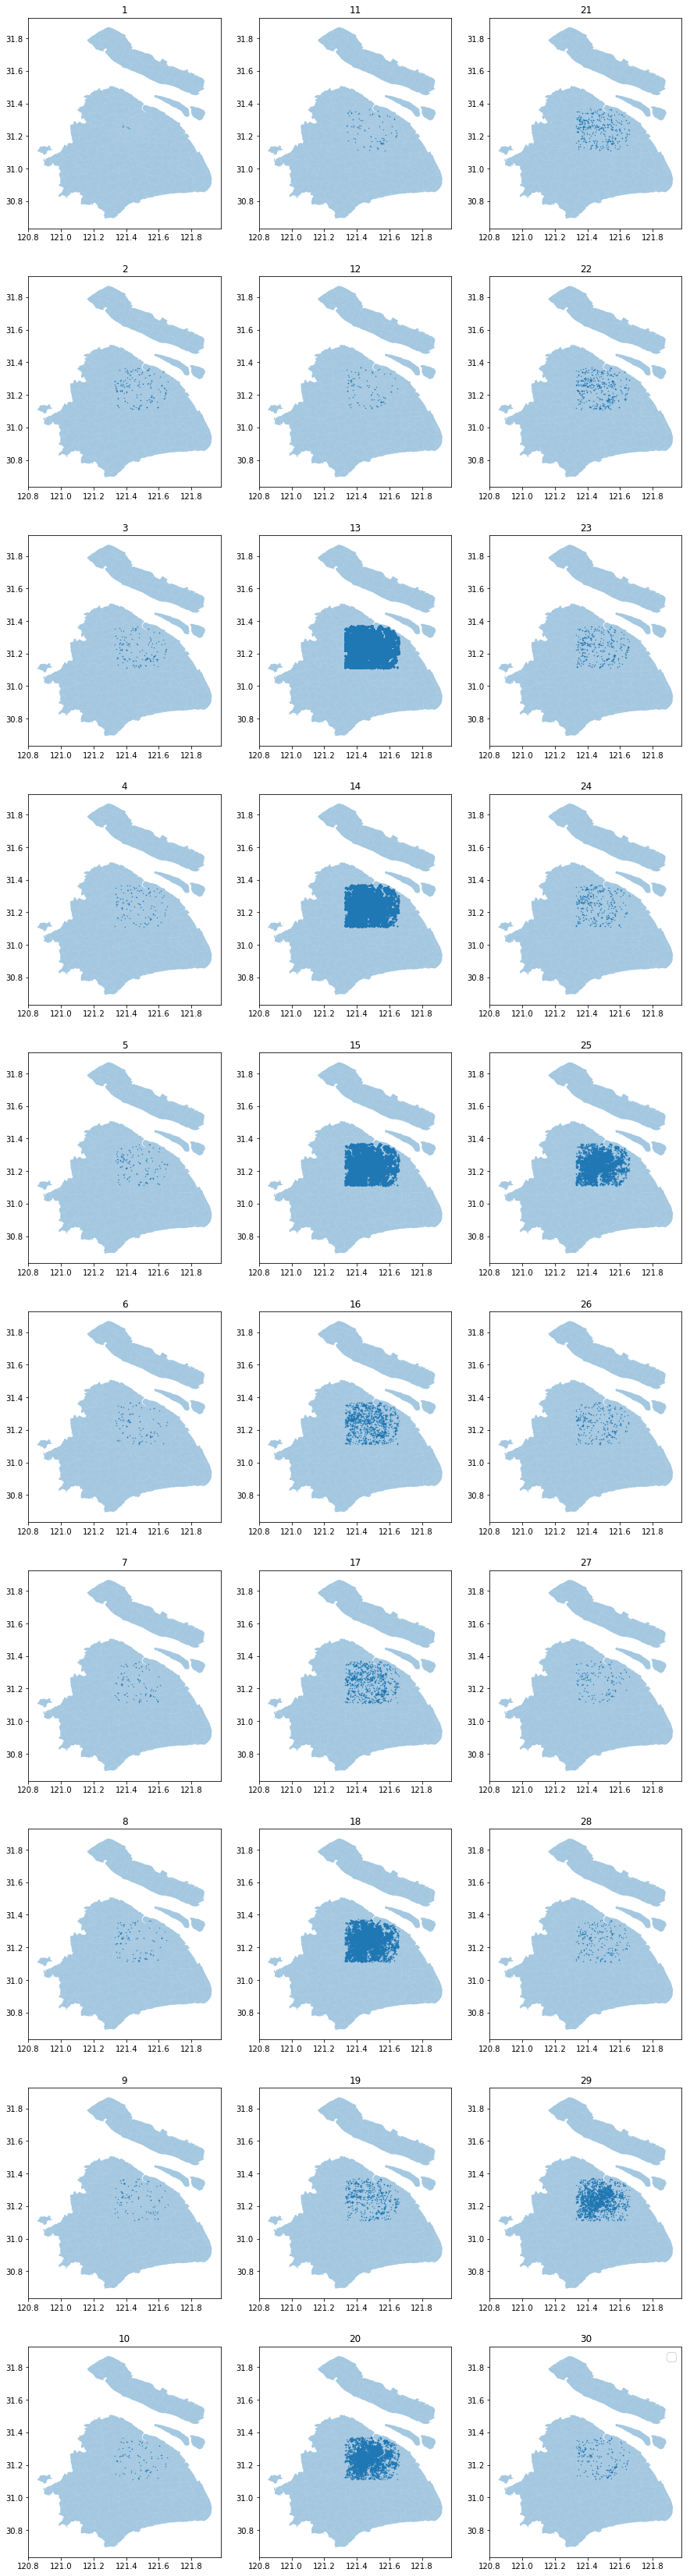

In [73]:
fig, ax = plt.subplots(10,3,figsize = (15,60))
for i in range(10):
    for j in range(3):
        city_map.plot(ax = ax[j][i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
        geo_df[geo_df['day'] == j*10+i].plot(ax =ax[j][i], markersize = 0.2)
        ax[j][i].set_title(j*10+i)

# city_map.plot(ax = ax[i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
# geo_df[geo_df['hour'] == i].plot(ax =ax[i], markersize = 0.2)
# ax[i].set_title(i+1)
plt.savefig('eachday.png')
plt.legend(prop={'size':15})

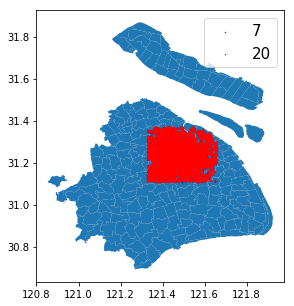

In [278]:
fig, ax = plt.subplots(figsize = (5,5))
city_map.plot(ax = ax)#, alpha = 0.4, color = 'grey')
geo_df[geo_df['hour'] == 7].plot(ax =ax, markersize = 0.2, color = 'blue', marker = 'o', label = '7')
geo_df[geo_df['hour'] == 20].plot(ax =ax, markersize = 0.2, color = 'red', marker = '^', label = '20')

plt.legend(prop={'size':15})

In [1]:
import pytables

ModuleNotFoundError: No module named 'pytables'